<center><h1>McGill University - <b>ECSE 415</b> Introduction to Computer Vision</h1>
<h2><b>Assignment 1</b> Image Filtering and Corner Detection</h2>
<h4>@author: Alex Wei</h4>
<h4>Last modified: 2023/09/22</h4></center><br>

## ***1 Image Acquisition***

In [9]:
# Please note that this ipynb file was written in Colab; opening with PyCharm (dark theme) leads to inverted color styles.

import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/ECSE 415/A1/"       # modify this to apply to path variables universally

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


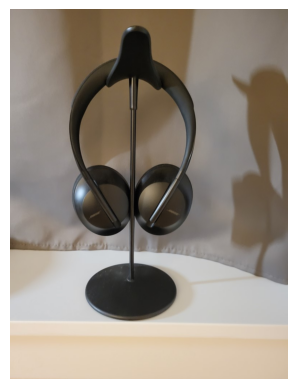

In [2]:
path1 = path + "frontal.jpg"
path2 = path + "lateral.jpg"

image1 = cv2.imread(path1)
image2 = cv2.imread(path2)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)    # cv2.imread() returns in BGR format, conversion necessary
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Should the two original images be needed for grading or verification, you can right click to download.
plt.imshow(image1)
plt.axis('off')
plt.show()

<pre>    Front View (original RGB)</pre><br><br>

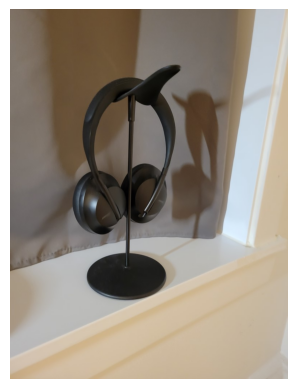

In [3]:
plt.imshow(image2)
plt.axis('off')
plt.show()

<pre>    Side View (original RGB)</pre>

## ***2 Convert to Grayscale***

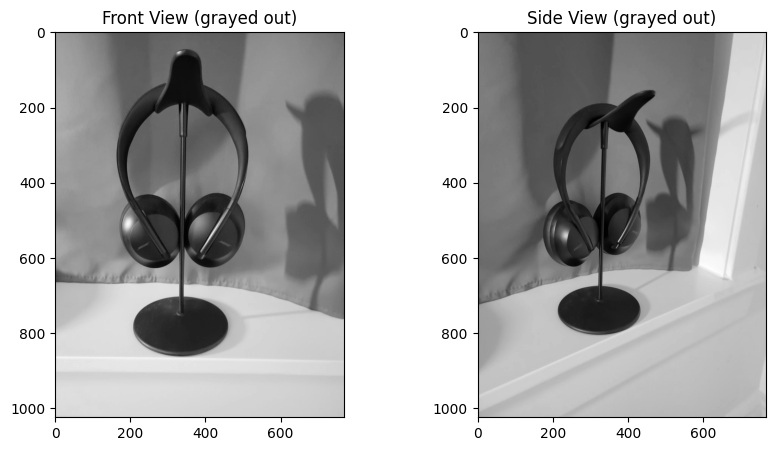

In [4]:
image1_gray = np.mean(image1, axis = 2).astype(np.uint8)    # same as cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2_gray = np.mean(image2, axis = 2).astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.imshow(image1_gray, cmap = 'gray')
ax1.set_title('Front View (grayed out)')
ax2.imshow(image2_gray, cmap = 'gray')
ax2.set_title('Side View (grayed out)')

plt.show()

## ***3 Smooth the images using Gaussian smoothing***

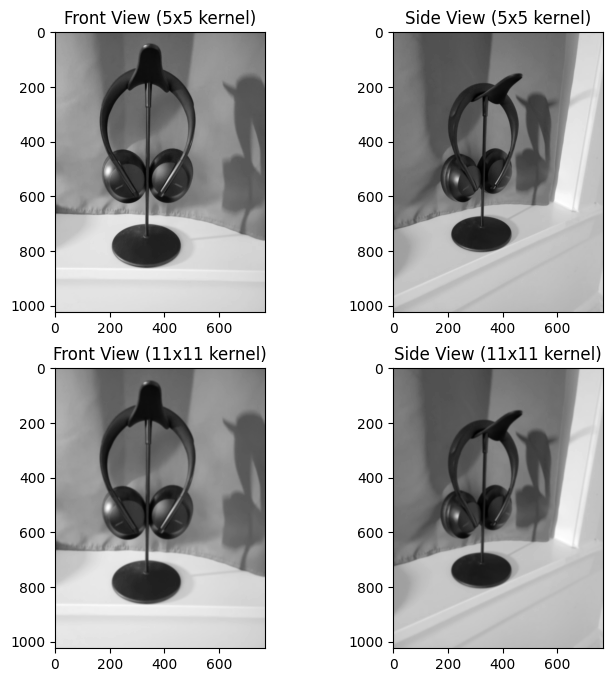

In [5]:
# Please be advised that since the initial images were taken using smartphone cameras with super
# high resolution and kernels this small don't provide much blur effect, the images were resized
image1_5blur = cv2.GaussianBlur(image1_gray, (5, 5), 0.83)    # according to lectures, sigmas are chosen to be filter width / 6
image2_5blur = cv2.GaussianBlur(image2_gray, (5, 5), 0.83)
image1_11blur = cv2.GaussianBlur(image1_gray, (11, 11), 1.83)
image2_11blur = cv2.GaussianBlur(image2_gray, (11, 11), 1.83)

fig, ax = plt.subplots(2, 2, figsize = (8, 8))

ax[0, 0].imshow(image1_5blur, cmap = 'gray')
ax[0, 0].set_title('Front View (5x5 kernel)')
ax[0, 1].imshow(image2_5blur, cmap = 'gray')
ax[0, 1].set_title('Side View (5x5 kernel)')

ax[1, 0].imshow(image1_11blur, cmap = 'gray')
ax[1, 0].set_title('Front View (11x11 kernel)')
ax[1, 1].imshow(image2_11blur, cmap = 'gray')
ax[1, 1].set_title('Side View (11x11 kernel)')

plt.show()

## ***4 Compute Image Gradients***

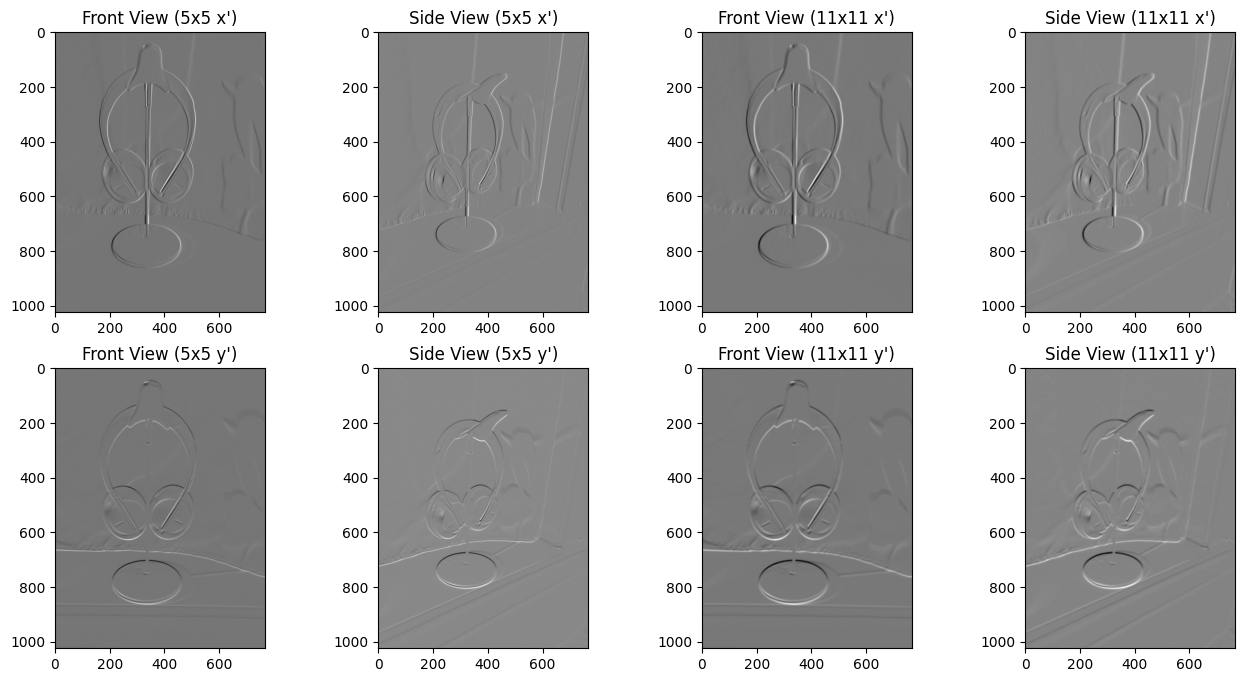

In [6]:
image1_5x = cv2.Sobel(image1_5blur, cv2.CV_64F, 1, 0, ksize = 3)
image1_5y = cv2.Sobel(image1_5blur, cv2.CV_64F, 0, 1, ksize = 3)
image2_5x = cv2.Sobel(image2_5blur, cv2.CV_64F, 1, 0, ksize = 3)
image2_5y = cv2.Sobel(image2_5blur, cv2.CV_64F, 0, 1, ksize = 3)
image1_11x = cv2.Sobel(image1_11blur, cv2.CV_64F, 1, 0, ksize = 3)
image1_11y = cv2.Sobel(image1_11blur, cv2.CV_64F, 0, 1, ksize = 3)
image2_11x = cv2.Sobel(image2_11blur, cv2.CV_64F, 1, 0, ksize = 3)
image2_11y = cv2.Sobel(image2_11blur, cv2.CV_64F, 0, 1, ksize = 3)

fig, ax = plt.subplots(2, 4, figsize = (16, 8))

ax[0, 0].imshow(image1_5x, cmap = 'gray')
ax[0, 0].set_title('Front View (5x5 x\')')
ax[0, 1].imshow(image2_5x, cmap = 'gray')
ax[0, 1].set_title('Side View (5x5 x\')')
ax[1, 0].imshow(image1_5y, cmap = 'gray')
ax[1, 0].set_title('Front View (5x5 y\')')
ax[1, 1].imshow(image2_5y, cmap = 'gray')
ax[1, 1].set_title('Side View (5x5 y\')')

ax[0, 2].imshow(image1_11x, cmap = 'gray')
ax[0, 2].set_title('Front View (11x11 x\')')
ax[0, 3].imshow(image2_11x, cmap = 'gray')
ax[0, 3].set_title('Side View (11x11 x\')')
ax[1, 2].imshow(image1_11y, cmap = 'gray')
ax[1, 2].set_title('Front View (11x11 y\')')
ax[1, 3].imshow(image2_11y, cmap = 'gray')
ax[1, 3].set_title('Side View (11x11 y\')')

plt.show()

## ***5 Compute the Edge Magnitude and Orientation***

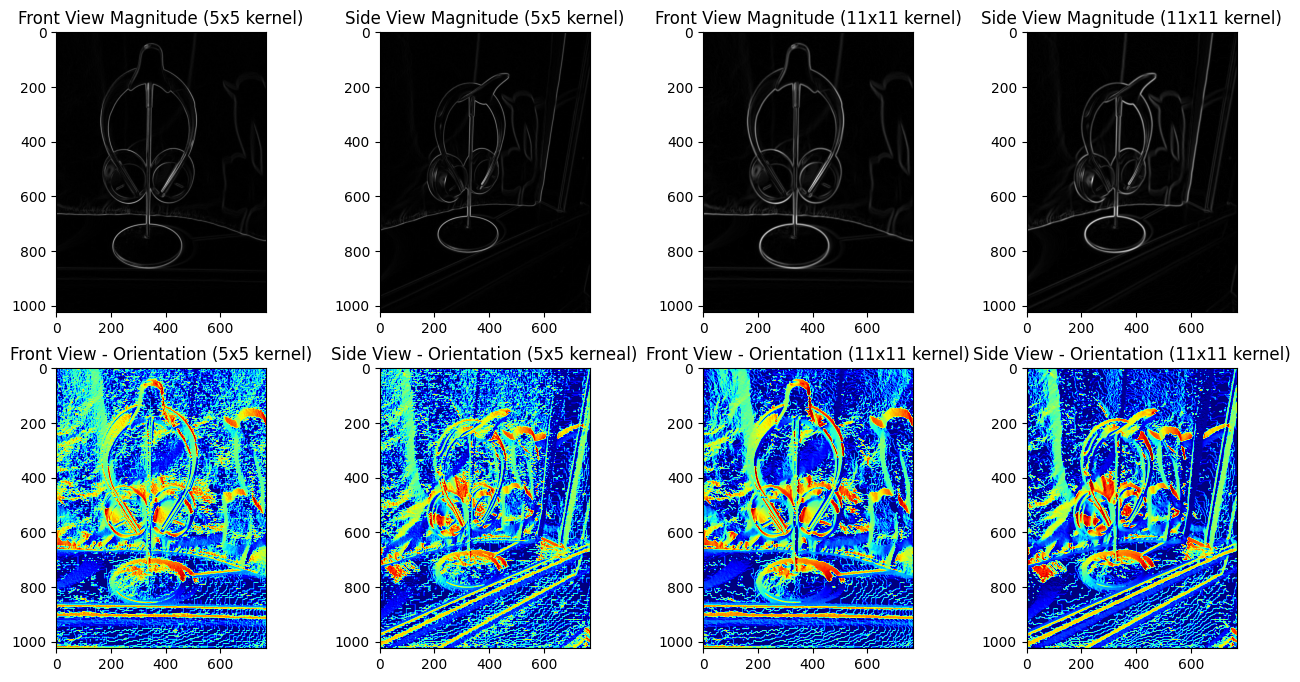

In [7]:
magnitude1_5 = cv2.magnitude(image1_5x, image1_5y)    # same as np.sqrt(image1_5x**2 + image1_5y**2)
orientation1_5 = cv2.phase(image1_5x, image1_5y)      # same as np.arctan2(image1_5x, image1_5y)
magnitude2_5 = cv2.magnitude(image2_5x, image2_5y)
orientation2_5 = cv2.phase(image2_5x, image2_5y)
magnitude1_11 = cv2.magnitude(image1_11x, image1_11y)
orientation1_11 = cv2.phase(image1_11x, image1_11y)
magnitude2_11 = cv2.magnitude(image2_11x, image2_11y)
orientation2_11 = cv2.phase(image2_11x, image2_11y)

fig, ax = plt.subplots(2, 4, figsize = (16, 8))

ax[0, 0].imshow(magnitude1_5, cmap = 'gray')
ax[0, 0].set_title('Front View Magnitude (5x5 kernel)')
ax[0, 1].imshow(magnitude2_5, cmap = 'gray')
ax[0, 1].set_title('Side View Magnitude (5x5 kernel)')
ax[0, 2].imshow(magnitude1_11, cmap = 'gray')
ax[0, 2].set_title('Front View Magnitude (11x11 kernel)')
ax[0, 3].imshow(magnitude2_11, cmap = 'gray')
ax[0, 3].set_title('Side View Magnitude (11x11 kernel)')

ax[1, 0].imshow(orientation1_5, cmap = 'jet')
ax[1, 0].set_title('Front View - Orientation (5x5 kernel)')
ax[1, 1].imshow(orientation2_5, cmap = 'jet')
ax[1, 1].set_title('Side View - Orientation (5x5 kerneal)')
ax[1, 2].imshow(orientation1_11, cmap = 'jet')
ax[1, 2].set_title('Front View - Orientation (11x11 kernel)')
ax[1, 3].imshow(orientation2_11, cmap = 'jet')
ax[1, 3].set_title('Side View - Orientation (11x11 kernel)')

plt.show()

## ***6 Canny Edge Detection with openCV***
It has been tested that lower thresholds work better for these particular images.

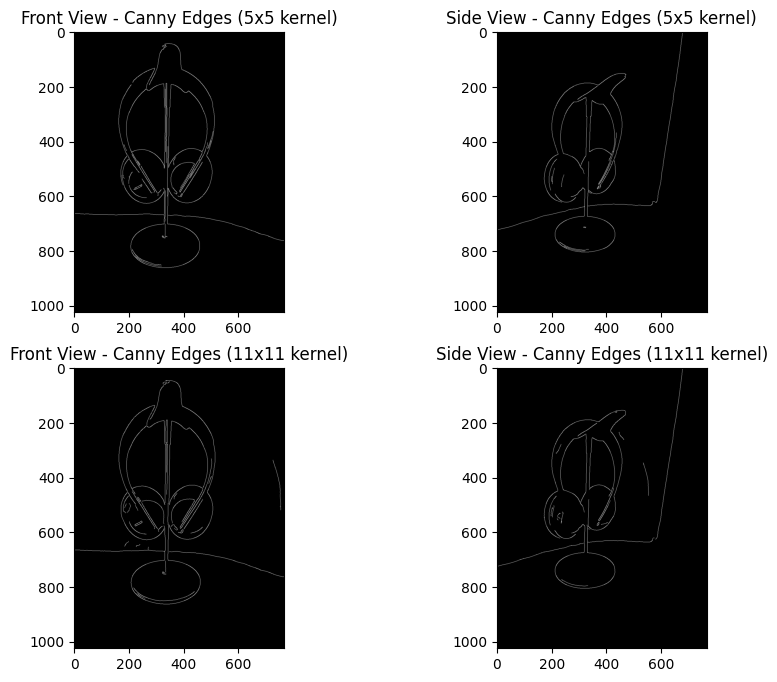

In [8]:
canny1_5 = cv2.Canny(image1_5blur, 50, 150)
canny2_5 = cv2.Canny(image2_5blur, 50, 200)
canny1_11 = cv2.Canny(image1_11blur, 30, 80)
canny2_11 = cv2.Canny(image2_11blur, 40, 90)

fig, ax = plt.subplots(2, 2, figsize = (10, 8))

ax[0, 0].imshow(canny1_5, cmap ='gray')
ax[0, 0].set_title('Front View - Canny Edges (5x5 kernel)')
ax[0, 1].imshow(canny2_5, cmap = 'gray')
ax[0, 1].set_title('Side View - Canny Edges (5x5 kernel)')

ax[1, 0].imshow(canny1_11, cmap = 'gray')
ax[1, 0].set_title('Front View - Canny Edges (11x11 kernel)')
ax[1, 1].imshow(canny2_11, cmap = 'gray')
ax[1, 1].set_title('Side View - Canny Edges (11x11 kernel)')

plt.show()